# **Comparison Between Minimum Requirements and Actual Player Hardware**

This project aims to perform a descriptive analysis and compare the Minimum and Recommended Requirements of a list of games. Additionally, it seeks to draw conclusions about the optimization of the most recent titles. For this initial study, the analysis focused exclusively on NVIDIA GPUs, considering that this is the most expensive component of a gaming PC.


# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings

In [2]:
# Seaborn style
sns.set_style("dark")

# Disable Warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
# Load games requirements table
games_requirement_data = pd.read_csv('games_requirement_data.csv', index_col=0)

# Load benchmark score table
benchmark_score_data = pd.read_csv('benchmark_score_data.csv', index_col=0)

# Load GPU table
gpu_data = pd.read_csv('gpu_data.csv', index_col=0)

# Load RAM table
ram_data = pd.read_csv('ram_data.csv', index_col=0)

# Handling Null Values

In [4]:
# Function to count null values
def null_values(df):
    for column in df.columns:
        null_count = df[column].isna().sum()
        if (null_count>0):
            print(f'{column}: {null_count} null values')

In [5]:
null_values(games_requirement_data)

gpu_minimum_benchmark_score: 7 null values
gpu_recommended_benchmark_score: 2 null values


In [6]:
null_values(benchmark_score_data)

In [7]:
null_values(gpu_data)

benchmark_score: 6 null values


In [8]:
null_values(ram_data)

In [9]:
# Drop null values
games_requirement_data.dropna(inplace=True)

# Filtering old games

Games released more than three years ago will not enter in the analysis

In [10]:
# Convert release date to date time
games_requirement_data['release_date'] = pd.to_datetime(games_requirement_data['release_date'], format='%Y. %B %d.')

# Filtering old games
games_requirement_data = games_requirement_data[games_requirement_data['release_date'].dt.year >= 2023]

# Extract only date from datetime object
games_requirement_data['release_date'] = games_requirement_data['release_date'].dt.date

# Most dominant NVIDIA GPU on Market

In [11]:
# Sort values by Market Share
gpu_data.sort_values('market_share', ascending=False, inplace=True)

# Filter GPU by its Market Share
most_dominant = gpu_data.head(5).copy()
most_dominant['market_share'] = most_dominant['market_share'] * 100

In [12]:
print(f"Market share of Most Dominant GPUs on Market {round(most_dominant['market_share'].sum(),2)}%")

Market share of Most Dominant GPUs on Market 39.07%


# Wich Games are the easiest and the hardest to Run

In [13]:
games_requirement_data['benchmark_score'] = games_requirement_data['gpu_minimum_benchmark_score'] + games_requirement_data['gpu_recommended_benchmark_score']

games_requirement_data.sort_values('gpu_recommended_benchmark_score', ascending=False, inplace=True)

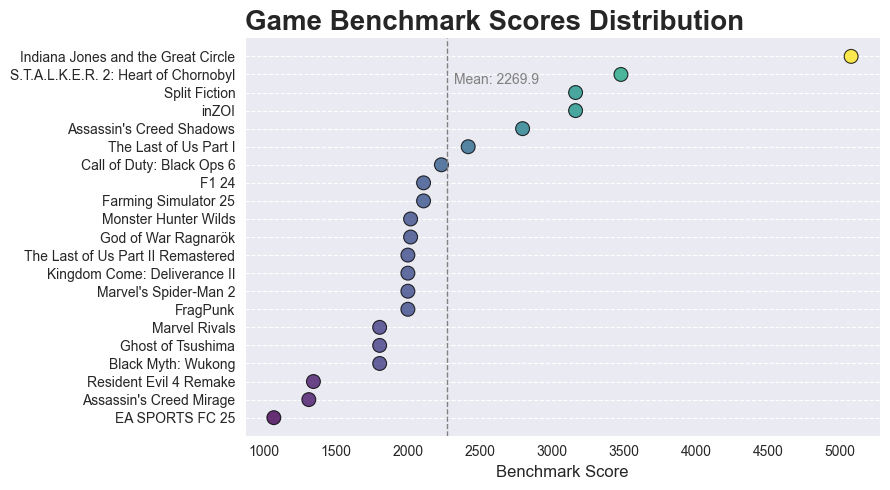

In [14]:
plt.figure(figsize=(9, 5))

# Create scatter plot with standardized style
scatter = sns.scatterplot(
    y='game_name',  # Changed to Y-axis to maintain horizontal standard
    x='gpu_recommended_benchmark_score',
    data=games_requirement_data,
    hue='gpu_recommended_benchmark_score',
    palette="viridis",  # Using default palette
    marker='o',
    edgecolor='black',
    alpha=0.8,
    s=100,
    legend=False  # Removing legend to simplify
)

# Add vertical reference line (adjusted for horizontal plot)
plt.axvline(x=games_requirement_data['gpu_recommended_benchmark_score'].mean(),
            color='gray', linestyle='dashed', linewidth=1)

# Standardized customization
plt.xlabel("Benchmark Score", fontsize=12)
plt.ylabel("")  # Removing Y label
plt.title("Game Benchmark Scores Distribution", fontsize=20, fontweight='bold', loc='left')

# Remove unnecessary borders
scatter.spines['right'].set_visible(False)
scatter.spines['top'].set_visible(False)

# Grid only on Y-axis (main)
plt.grid(True, axis='y', linestyle='--')

# Adjust Y-axis label rotation
plt.yticks(fontsize=10)

# Add annotation for mean line
plt.annotate(f'Mean: {games_requirement_data["gpu_recommended_benchmark_score"].mean():.1f}',
             xy=(games_requirement_data['gpu_recommended_benchmark_score'].mean(), 0),
             xytext=(5, -20), textcoords='offset points',
             color='gray', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

First, let's analyze the recommended system requirements of the games being evaluated. Remember that the higher the benchmark score, the better the graphics card should be.

In this chart, we can see that there are more games below the average (15 out of a total of 21). Notable mentions include Resident Evil 4 Remake, Assassin's Creed Mirage, and EA Sports FC 25—the first two were released in 2023, while the latter came out in 2024.

Among the games above the average are Indiana Jones and the Great Circle, S.T.A.L.K.E.R. 2: Heart of Chornobyl, Split Fiction, InZOI, Assassin's Creed Shadows, and The Last of Us Part 1. All these titles were released either late last year or early this year, except for The Last of Us Part 1, which came out in 2023 and is the most demanding game among those released in 2023.

The biggest outlier here is Indiana Jones and the Great Circle, released in 2024, which has a recommended system requirement more than twice the average of the analyzed games. It is significantly more demanding than other titles released around the same time or even those launched in 2024.

## Market Share of each GPU

In [15]:
# Sort GPU by benchmark score
most_dominant.sort_values('benchmark_score', ascending=False, inplace=True)

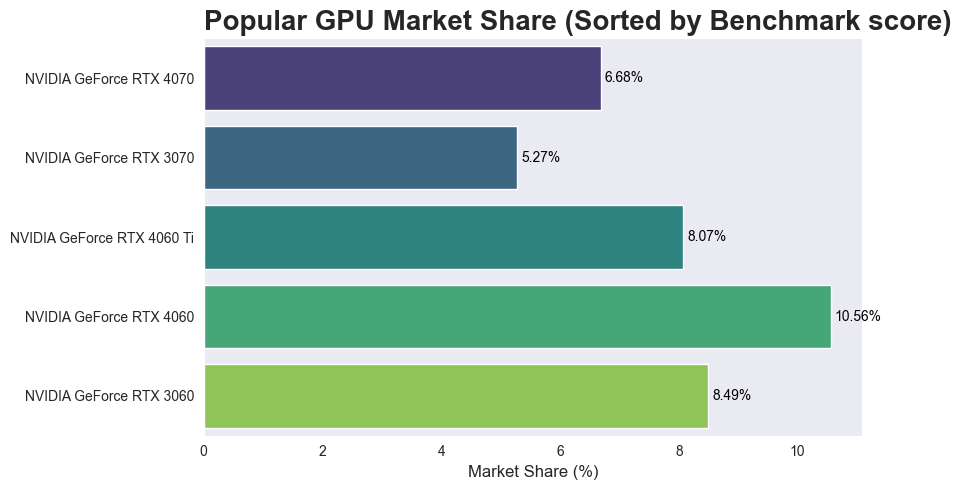

In [16]:
# Create the horizontal bar chart
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    y=most_dominant['gpu_name'], 
    x=most_dominant['market_share'], 
    palette="viridis"
)

# Add values inside the bars (formatted as percentage)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3, fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Market Share (%)', fontsize=12)
plt.ylabel('')
plt.title('Popular GPU Market Share (Sorted by Benchmark score)', fontsize=20, fontweight='bold', loc='left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

Now, let's take a look at the five most dominant GPUs on the market.

They represent approximately 39% of NVIDIA GPUs in the market. The benchmark-ordered chart shows that the most powerful GPUs hold a smaller market share, but the most powerful one does not necessarily have the smallest share.

The market-leading GPU is the RTX 4060, accounting for approximately 10% of the total NVIDIA GPUs in this study, followed by the RTX 3060 and the RTX 4060 Ti.

## How many games each GPU can run on Minimum and Recommended settings

In [17]:
# Function to calculate compatible games
def get_compatible_games(benchmark_score):
    compatible_minimum = games_requirement_data[games_requirement_data['gpu_minimum_benchmark_score'] <= benchmark_score]
    compatible_recommended = games_requirement_data[games_requirement_data['gpu_recommended_benchmark_score'] <= benchmark_score]
    return len(compatible_minimum), len(compatible_recommended)

# Collecting data for the chart
data = []

for gpu_name, score in zip(most_dominant['gpu_name'], most_dominant['benchmark_score']):
    min_count, rec_count = get_compatible_games(score)
    
    data.append({'GPU': gpu_name, 'Configuration': 'Minimum', 'Compatible Games': min_count})
    data.append({'GPU': gpu_name, 'Configuration': 'Recommended', 'Compatible Games': rec_count})

# Creating a DataFrame for Seaborn
compatible_games_data = pd.DataFrame(data)

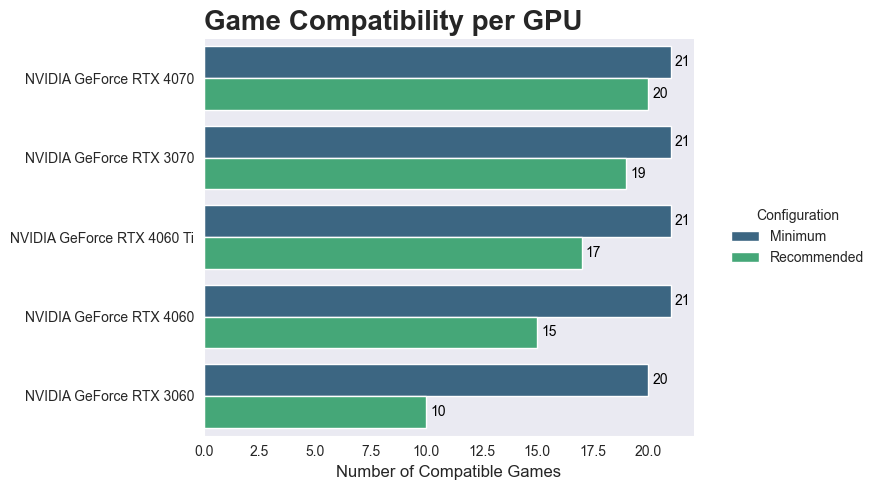

In [18]:
# Create the standardized horizontal bar plot
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    y='GPU', 
    x='Compatible Games', 
    hue='Configuration', 
    data=compatible_games_data, 
    palette="viridis",
    dodge=True
)

# Add values on bars (standardized formatting)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10, color='black')

# Standardized labels and title
plt.xlabel('Number of Compatible Games', fontsize=12)
plt.ylabel('')
plt.title('Game Compatibility per GPU', fontsize=20, fontweight='bold', loc='left')

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Standardized legend position and style
plt.legend(
    title='Configuration',
    frameon=False,
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    fontsize=10
)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

How Many Games Can Each GPU Run at Minimum and Recommended Settings?

In general, most GPUs meet the minimum requirements to run all 21 games in the study, except for the RTX 3060, which fails to meet the requirements for one game. Overall, the RTX 4060, RTX 3060, and RTX 4060 Ti fulfill their roles as entry-level GPUs, as they meet the minimum requirements for all games (except for the RTX 3060, as mentioned earlier).

However, none of the GPUs meet the recommended requirements for all games, not even the most powerful ones. The standout performers are the RTX 3070 and RTX 4070, which fall short on only one and two games, respectively.

## Wich game each GPU can't run on Recommended settings

In [19]:
# Function to calculate games that run on minimum but not recommended settings
def get_minimum_but_not_recommended(benchmark_score):
    # Games that can run on minimum settings
    games_able_to_run_minimum = games_requirement_data[games_requirement_data['gpu_minimum_benchmark_score'] <= benchmark_score]
    
    # Games that can run on recommended settings
    games_able_to_run_recommended = games_requirement_data[games_requirement_data['gpu_recommended_benchmark_score'] <= benchmark_score]
    
    # Filter games that run on minimum but not recommended settings
    games_minimum_not_recommended = games_able_to_run_minimum[~games_able_to_run_minimum['game_name'].isin(games_able_to_run_recommended['game_name'])]
    
    return games_minimum_not_recommended['game_name'].to_list(), games_minimum_not_recommended

# List to store games that don't meet recommended requirements for each GPU
all_games_not_recommended = []

# Iterate over each GPU and calculate games that run on minimum but not recommended settings
for gpu_name, score in zip(most_dominant['gpu_name'], most_dominant['benchmark_score']):
    games_list, games_not_recommended_df = get_minimum_but_not_recommended(score)
    
    # Print the results
    print(f"GPU: {gpu_name}")
    print(f"Games that CAN'T run at recommended: {games_list}\n")
    
    # Store the DataFrame for future analysis
    all_games_not_recommended.append(games_not_recommended_df)

# Concatenate all DataFrames of games that don't meet recommended requirements
all_games_not_recommended_data = pd.concat(all_games_not_recommended, ignore_index=True)

GPU: NVIDIA GeForce RTX 4070
Games that CAN'T run at recommended: ['Indiana Jones and the Great Circle']

GPU: NVIDIA GeForce RTX 3070
Games that CAN'T run at recommended: ['Indiana Jones and the Great Circle', 'S.T.A.L.K.E.R. 2: Heart of Chornobyl']

GPU: NVIDIA GeForce RTX 4060 Ti
Games that CAN'T run at recommended: ['Indiana Jones and the Great Circle', 'S.T.A.L.K.E.R. 2: Heart of Chornobyl', 'Split Fiction', 'inZOI']

GPU: NVIDIA GeForce RTX 4060
Games that CAN'T run at recommended: ['Indiana Jones and the Great Circle', 'S.T.A.L.K.E.R. 2: Heart of Chornobyl', 'Split Fiction', 'inZOI', "Assassin's Creed Shadows", 'The Last of Us Part I']

GPU: NVIDIA GeForce RTX 3060
Games that CAN'T run at recommended: ['S.T.A.L.K.E.R. 2: Heart of Chornobyl', 'Split Fiction', 'inZOI', "Assassin's Creed Shadows", 'The Last of Us Part I', 'Call of Duty: Black Ops 6', 'F1 24', 'Farming Simulator 25', 'Monster Hunter Wilds', 'God of War Ragnarök']



Here, we can analyze which games each GPU fails to meet the recommended requirements, helping us understand which games are better or worse optimized.

As previously noted, no GPU meets the recommended requirements to run Indiana Jones and the Great Circle, and only the RTX 4070 meets the recommended requirements for S.T.A.L.K.E.R. 2: Heart of Chornobyl, further confirming the poor optimization of these titles.

Overall, most GPUs fail to meet the recommended requirements for newer games (released in 2024 and 2025), with the exception of The Last of Us Part 1 (released in 2023), which also makes it onto the list of poorly optimized games.

In [20]:
# Filtering high requisite games
high_requisite_games = all_games_not_recommended_data[['game_name', 'gpu_minimum_benchmark_score', 'gpu_recommended_benchmark_score']].value_counts().reset_index()

# Sort games by recommended benchmark score
games_requirement_data.sort_values('gpu_recommended_benchmark_score', ascending=False, inplace=True)

# Create a list of high requisite games
high_requisite_games_list = high_requisite_games['game_name'].to_list()

# Slice the games requirement data using the list
high_requisite_games_requirement_data = games_requirement_data[games_requirement_data['game_name'].isin(high_requisite_games_list)]

<Figure size 900x500 with 0 Axes>

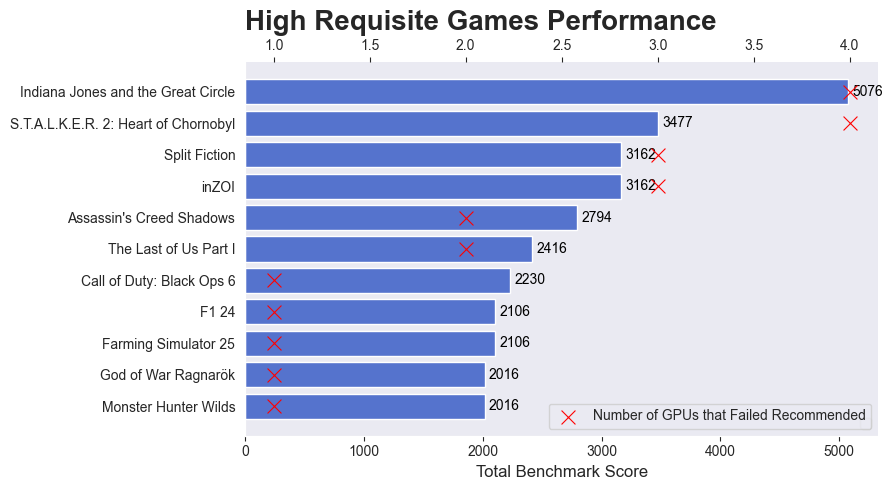

In [21]:
# Create figure and axes with standardized style
plt.figure(figsize=(9, 5))
fig, ax1 = plt.subplots(figsize=(9, 5))

# Main horizontal bar chart (standardized)
sns.barplot(
    y='game_name', 
    x='gpu_recommended_benchmark_score', 
    data=high_requisite_games_requirement_data, 
    ax=ax1, 
    color='royalblue'
)

# Add values on bars (standardized)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=3, fontsize=10, color='black')

# Create secondary X-axis for benchmark scores
ax2 = ax1.twiny()
sns.scatterplot(
    y='game_name', 
    x='count', 
    data=high_requisite_games, 
    color='red', 
    marker='x', 
    s=100,  # Marker size
    ax=ax2, 
    label='Number of GPUs that Failed Recommended'
)

# Standardized customization
ax1.set_xlabel("Total Benchmark Score", fontsize=12)
ax1.set_ylabel("")  # Removing Y label for cleaner look
ax2.set_xlabel("")
plt.title("High Requisite Games Performance", fontsize=20, fontweight='bold', loc='left')

# Remove borders and grid (standardized)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.grid(False)

# Adjusting legend to bottom right corner
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")

# Standardized layout adjustment
plt.tight_layout()

# Display the chart
plt.show()

The chart clearly highlights that Indiana Jones and the Great Circle and S.T.A.L.K.E.R. 2: Heart of Chornobyl are poorly optimized games.

A logical pattern can be observed in the other games: as the system requirements decrease, more GPUs are capable of running them.

## Wich game each GPU can't run on Minimum settings

In [22]:
def get_below_minimum(benchmark_score, games_requirement_data):
    # Filter games that can't run even at minimum requirements
    games_below_minimum = games_requirement_data[
        games_requirement_data['gpu_minimum_benchmark_score'] > benchmark_score
    ]
    
    return games_below_minimum['game_name'].to_list(), games_below_minimum

# List to store DataFrames of games that can't run at minimum settings
all_games_below_minimum = []

# Iterate over each GPU and calculate games that can't run at minimum
for gpu_name, score in zip(most_dominant['gpu_name'], most_dominant['benchmark_score']):
    games_list, games_below_minimum_df = get_below_minimum(score, games_requirement_data)
    
    # Display results
    print(f"GPU: {gpu_name}")
    print(f"Games that CAN'T run even at minimum: {games_list}\n")
    
    # Store DataFrame for future analysis
    all_games_below_minimum.append(games_below_minimum_df)

# Concatenate all DataFrames
all_games_below_minimum_data = pd.concat(all_games_below_minimum, ignore_index=True)

GPU: NVIDIA GeForce RTX 4070
Games that CAN'T run even at minimum: []

GPU: NVIDIA GeForce RTX 3070
Games that CAN'T run even at minimum: []

GPU: NVIDIA GeForce RTX 4060 Ti
Games that CAN'T run even at minimum: []

GPU: NVIDIA GeForce RTX 4060
Games that CAN'T run even at minimum: []

GPU: NVIDIA GeForce RTX 3060
Games that CAN'T run even at minimum: ['Indiana Jones and the Great Circle']



It is clear how demanding and poorly optimized Indiana Jones and the Great Circle is, as the second most dominant GPU on the market fails to meet even the minimum requirements for a 2024 game, despite being able to run all other games on the list, including more recent titles.

# Most Powerful GPUs

In [23]:
# Sort values by Benchmark Score
gpu_data.sort_values('benchmark_score', ascending=False, inplace=True)

# Filter GPU by its Market Share
most_powerful = gpu_data.head().copy()
most_powerful['market_share'] = most_powerful['market_share'] * 100

In [24]:
# Calculate Market Share for Poweful GPUs
print(f"Market share of Most Powerful GPUs on Market {round(most_powerful['market_share'].sum(),2)}%")

Market share of Most Powerful GPUs on Market 4.92%


In [25]:
# Sort GPU by benchmark score
most_powerful.sort_values('market_share', ascending=False, inplace=True)

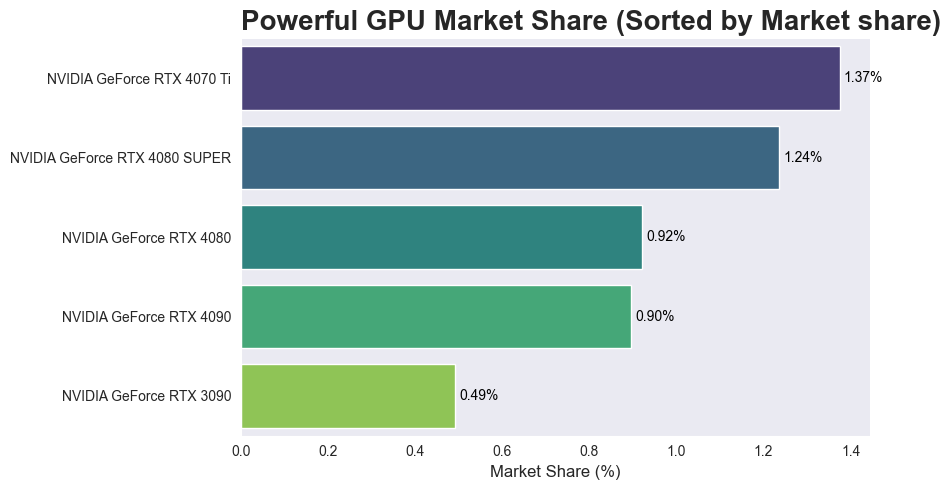

In [ ]:
# Create the horizontal bar chart
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    y=most_powerful['gpu_name'], 
    x=most_powerful['market_share'], 
    palette="viridis"
)

# Add values inside the bars (formatted as percentage)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3, fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Market Share (%)', fontsize=12)
plt.ylabel('')
plt.title('Powerful GPU Market Share (Sorted by Market share)', fontsize=20, fontweight='bold', loc='left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

Finally, let's look at the five most powerful GPUs.

The five most powerful GPUs analyzed represent only about 5% of the market share, making a deeper analysis unnecessary, as these GPUs meet the requirements for any game in the study.